In [1]:
#Ayush Pandhi [1003227457] [University of Toronto]
#Chloe Cheng [1003254818] [University of Toronto]

#Importing required modules
import struct
import numpy as np
import matplotlib.pyplot as plt
import math

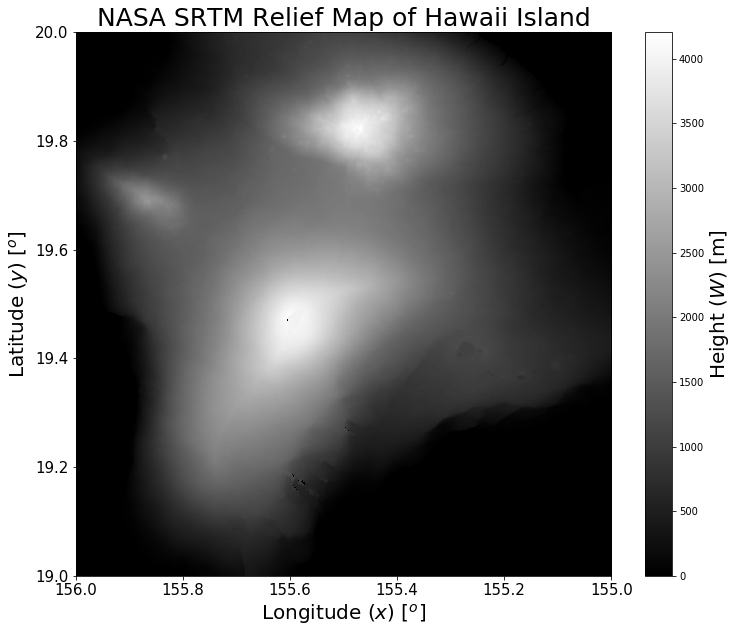

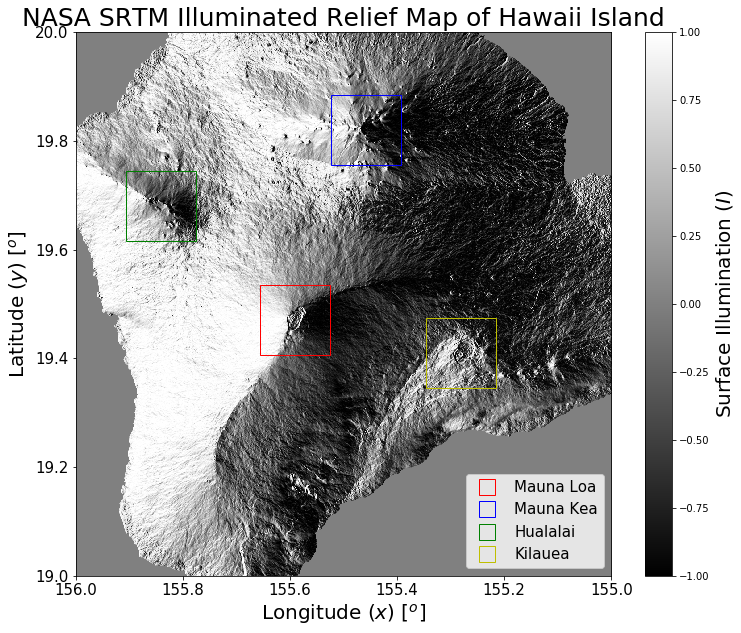

In [14]:
#PROBLEM 1

#PART B
#Opening the data
f = open('N19W156.hgt', 'rb')

#Dummy array of 1442401 zeros
data = np.zeros(1201*1201)

#Using a loop to read the data into an array as done in the lab manual
for i in range(len(data)):
    buffer = f.read(2)
    data[i] = struct.unpack('>h', buffer)[0]

#Reshaping the data to be 1201 by 1201
W = data.reshape(1201,1201)

#Defining ranges of longitude and latitude in degrees
lat = np.linspace(19, 20, 1201)
long = np.linspace(155, 156, 1201)

#Defining constants used in numerical differentiation and finding I
h = 420       #[m]
phi = np.pi   #[rad]
dx = 1        #Diff spacing for x
dy = 1        #Diff spacing for y

#Setting up a 1201x1201 array for dW/dx
dWdx = np.zeros_like(W)

#Using a double for loop to compute dW/dx numerically
for i in range(1201):
    
    #Using forward/backward difference for edge cases
    dWdx[i,0] = (W[i,1] - W[i,0])/(dx)
    dWdx[i,1200] = (W[i,1200] - W[i,1199])/(dx)
    
    #Using central differnece for the rest of the cases
    for j in range(1,1200):
        dWdx[i,j] = (W[i,j+1] - W[i,j-1])/(2*dx)
        
#Setting up a 1201x1201 array for dW/dy
dWdy = np.zeros_like(W)

#Using a double for loop to compute dW/dy numerically
for j in range(1201):
    
    #Using forward/backward difference for edge cases
    dWdy[0,j] = (W[1,j] - W[0,j])/(dy)
    dWdy[1200,j] = (W[1200,j] - W[1199,j])/(dy)
    
    #Using central differnece for the rest of the cases
    for i in range(1,1200):
        dWdy[i,j] = (W[i+1,j] - W[i-1,j])/(2*dy)

#Computing I as in equation 3 and 4 from the lab manual
I = -((np.cos(phi)*dWdx) + (np.sin(phi)*dWdy))/(((dWdx**2) + (dWdy**2) + 1)**(1/2))

#Plotting W as a function of longitude and latitude as a colour map
plt.figure(figsize=(12,10))
plt.imshow(W, extent=[np.amax(long), np.amin(long), np.amin(lat), np.amax(lat)], vmin=0, vmax=4205, aspect='auto', cmap='gist_gray')
plt.title('NASA SRTM Relief Map of Hawaii Island', fontsize=25)
plt.xlabel('Longitude ($x$) [$^{o}$]', fontsize=20)
plt.ylabel('Latitude ($y$) [$^{o}$]', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.colorbar().set_label('Height ($W$) [m]', rotation=90, size=20)
plt.savefig('lab3_q1_plot1.pdf', bbox_inches='tight')
plt.show()

#Plotting I as a function of longitude and latitude as a colour map
plt.figure(figsize=(12,10))
plt.imshow(I, extent=[np.amax(long), np.amin(long), np.amin(lat), np.amax(lat)], vmin=-1, vmax=1, aspect='auto', cmap='gist_gray')
plt.plot(155.590, 19.470, 'rs', markersize=70, fillstyle='none', label='Mauna Loa')
plt.plot(155.458, 19.820, 'bs', markersize=70, fillstyle='none', label='Mauna Kea')
plt.plot(155.840, 19.680, 'gs', markersize=70, fillstyle='none', label='Hualalai')
plt.plot(155.280, 19.410, 'ys', markersize=70, fillstyle='none', label='Kilauea')
plt.title('NASA SRTM Illuminated Relief Map of Hawaii Island', fontsize=25)
plt.xlabel('Longitude ($x$) [$^{o}$]', fontsize=20)
plt.ylabel('Latitude ($y$) [$^{o}$]', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(markerscale=0.22, loc='lower right', fontsize=15)
plt.colorbar().set_label('Surface Illumination ($I$)', rotation=90, size=20)
plt.savefig('lab3_q1_plot2.pdf', bbox_inches='tight')
plt.show()

Computed period with N=8: 1.7301762343365563
Computed period with N=16: 1.770715490242243
Expected classical result as x0-->0: 1.8137993642342176
Fractional Error for both N=8 and N=16 cases: 0.0836231298976613 0.04308387399197455


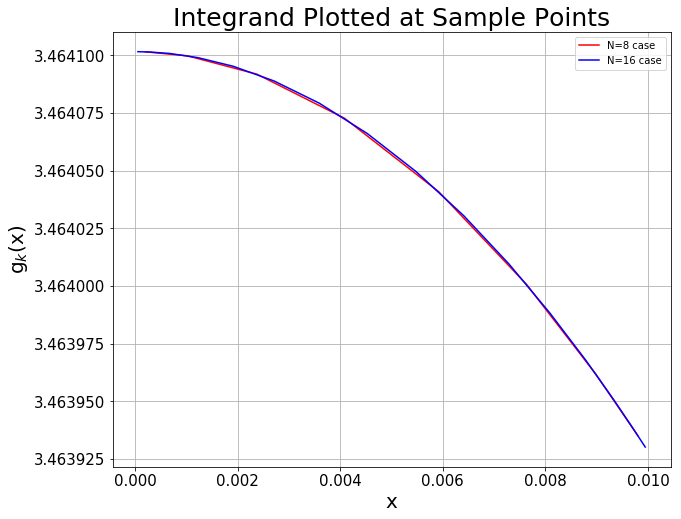

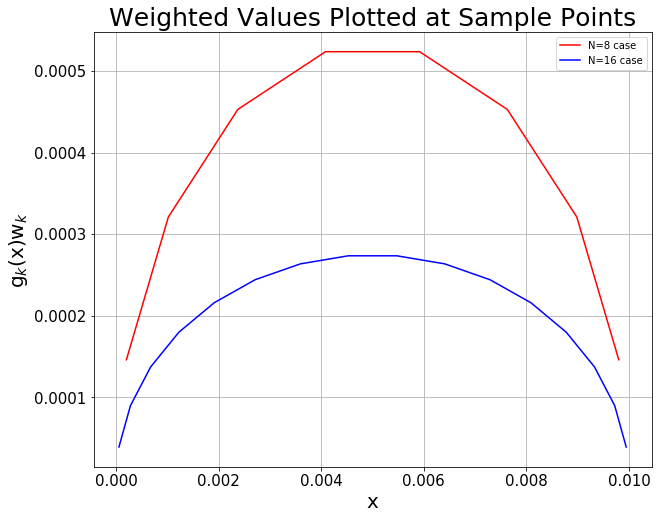

Fractional Error for the N=200 case (small amplitude case): 0.003545712230504261


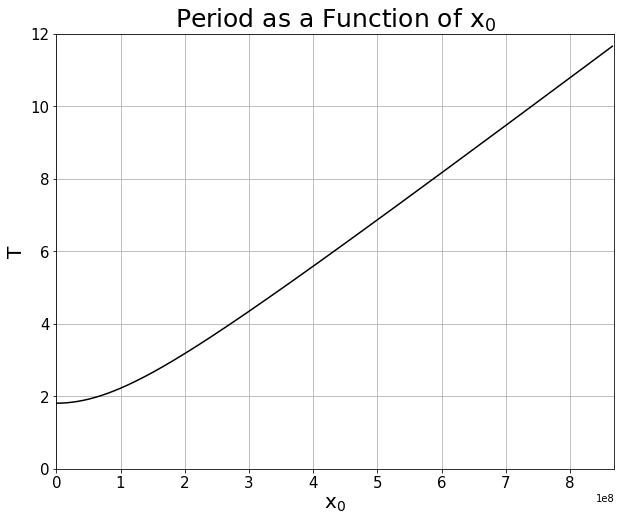

In [6]:
#PROBLEM 2

#PART A
#Defining the two guassian quadrature functions from the text
#----------------------------------------------------------------------
#Gaussian quadrature function 1 from text
def gaussxw(N):
    
    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))
    
    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = np.max(np.abs(dx))
        
    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)
    
    return x,w

#Gaussian quadrature frunction 2 from text
def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w
#----------------------------------------------------------------------

#Defining constants
m = 1      #[kg]
k = 12   #[N/m]
x0 = 0.01     #[m]
N1 = 8
N2 = 16
c= 3e8     #[m/s]

#Defining g(x) as given in the lab manual
def g(x, x0):
    return (c*(((0.5*k*(x0**2 - x**2)*(2*m*(c**2) + 0.5*k*(x0**2 - x**2)))/((m*(c**2) + 0.5*k*(x0**2 - x**2))**2))**0.5))

#Applying the gaussian quadrature function for N=8
x, w = gaussxwab(N1, 0, x0)

#Using gaussian quadrature to compute the integral for T (N=8)
T1 = 0
for i in range(N1):
    T1 += 4*w[i]*(1/g(x[i], x0))
    
#Printing the resulting T for N=8
print('Computed period with N=8:', T1)

#Applying the gaussian quadrature function for N=16
x2, w2 = gaussxwab(N2, 0, x0)

#Using gaussian quadrature to compute the integral for T (N=16)
T2 = 0
for i in range(N2):
    T2 += 4*w2[i]*(1/g(x2[i], x0))
    
#Printing the resulting T for N=16
print('Computed period with N=16:', T2)

#Printing the expected classical result
print('Expected classical result as x0-->0:', 2*np.pi*((m/k)**0.5))

#Computing errors for each case
err1 = 2*np.pi*((m/k)**0.5) - T1
err2 = 2*np.pi*((m/k)**0.5) - T2
print('Fractional Error for both N=8 and N=16 cases:', err1, err2)

#Plotting g(x) vs x
plt.figure(figsize=(10,8))
plt.title('Integrand Plotted at Sample Points', fontsize=25)
plt.xlabel('x', fontsize=20)
plt.ylabel('g$_{k}$(x)', fontsize=20)
plt.plot(x, g(x, 1), 'r-', label='N=8 case')
plt.plot(x2, g(x2, 1), 'b-', label='N=16 case')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
plt.savefig('lab3_q2_plot1.pdf', bbox_inches='tight')
plt.show()

#Plotting g(x)*w vs x
plt.figure(figsize=(10,8))
plt.title('Weighted Values Plotted at Sample Points', fontsize=25)
plt.xlabel('x', fontsize=20)
plt.ylabel('g$_{k}$(x)w$_{k}$', fontsize=20)
plt.plot(x, (1/g(x, 1))*w, 'r-', label='N=8 case')
plt.plot(x2, (1/g(x2, 1))*w2, 'b-', label='N=16 case')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()
plt.savefig('lab3_q2_plot2.pdf', bbox_inches='tight')
plt.show()

#PART C
#Setting N=200 and a list of x0 values between 1 and x_c computedi n PART B
N3 = 200
x0_list = np.arange(1, 8.66e8, (8.66e8 - 1)/10000)

#Making an array for T values for each x0 values above
T3_list = np.zeros_like(x0_list)

#Using gaussian quadrature to compute T for N=200 and all x0
for i in range(len(x0_list)):
    x3_list, w3_list = gaussxwab(N3, 0, x0_list[i])
    for j in range(N3):
        T3_list[i] += 4*w3_list[j]*(1/g(x3_list[j], x0_list[i]))
        
#Printing the relative error with the expected classical result
print('Fractional Error for the N=200 case (small amplitude case):', -T3_list[0] + 2*np.pi*((m/k)**0.5))

#Plotting T vs x0
plt.figure(figsize=(10,8))
plt.title('Period as a Function of x$_{0}$', fontsize=25)
plt.xlabel('x$_{0}$', fontsize=20)
plt.ylabel('T', fontsize=20)
plt.plot(x0_list, T3_list, 'k-')
plt.xlim(0,0.869e9)
plt.ylim(0,12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.savefig('lab3_q2_plot3.pdf', bbox_inches='tight')
plt.show()

Optimal h: 8.434326653017497e-06
The minimum absolute error: 5.4231867340935493e-11
The corresponding h value for the minimum error: 1e-05


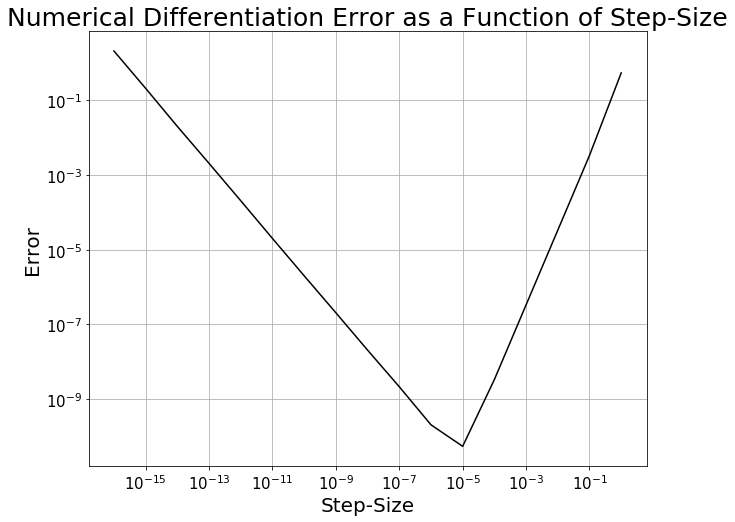

Cauchy derivative function output for m=1 to m=10: [   2.    4.    8.   16.   32.   64.  128.  256.  512. 1024.]


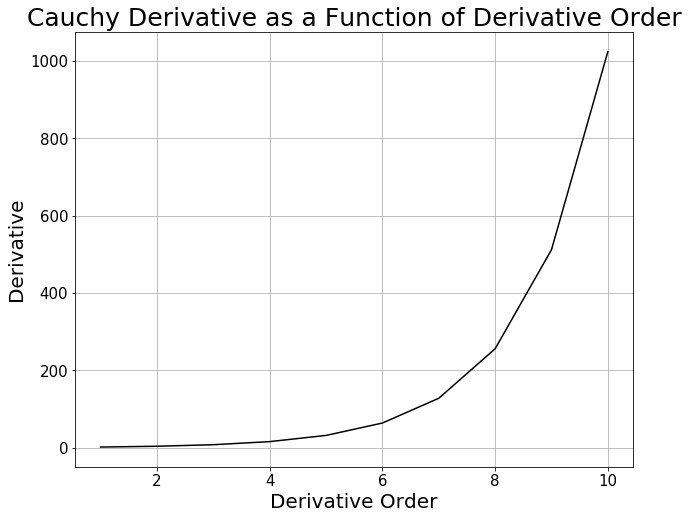

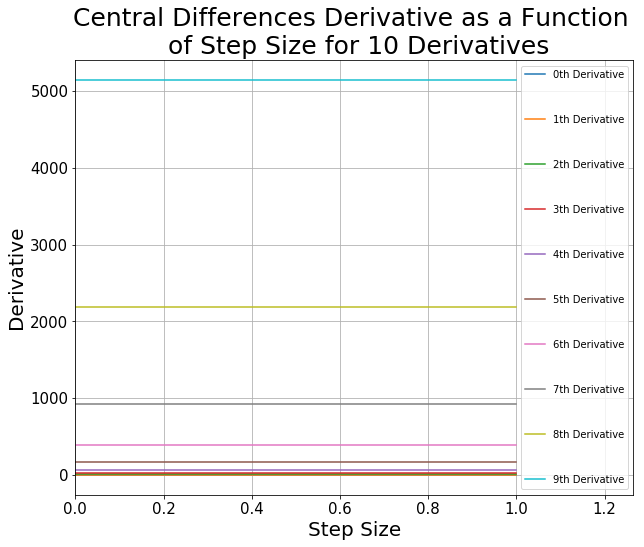

In [16]:
#PROBLEM 3

#PART A
#Defining an array of 17 h values
h3 = np.array((1e-16, 1e-15, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1))   #Create array of h values 

#Define the given function in the lab manual
def function(x):
    return np.exp(2*x)

#Creating an array for dx for the 17 h values above
dx = np.zeros(len(h3))

#Calculate the derivative at x=0 for each step size h
for i in range(len(h3)):
    dx[i] = (function(1)-function(-1))/(2.0*h3[i])
    
#Defining a fucntion to calculate 3rd derivative to calculate the error    
def delta(f, x, m, h):
    
    #Using forward/backward difference for edge cases
    if m > 1:
        return (delta(f, x + h/2, m - 1, h) - delta(f, x - h/2, m-1, h))/(h)
    
    #Using central difference for the rest of the cases
    else:
        return (f(x + h/2) - f(x - h/2))/(h)

#Creating an array for the outputs from the delta function above for the 17 h values
dx3 = np.zeros(len(h3))

#Applying the delta function for each h value above
for i in range(len(h3)):
    dx3[i] = delta(function, 0, 3, h3[i])
    
#Defining a function to calculate error for each derivative calculated
def dx_err(C, f, h, f3):
    err = (2*C*np.abs(f))/h +(1/24)*(h**2)*np.abs(f3)
    return err

#Defining the constant C
C = 1e-16

#Creating an array of absolute error for the 17 h values
abs_err = np.zeros(len(h3))

#Computing absolute error with the dx_error function for given h values
for i in range(len(h3)):
    abs_err[i] = dx_err(C, function(0), h3[i], dx3[i])
    
#Calculate optimal value of h
h_opt = (24*C*np.abs(function(0)/(4*np.exp(2*0))))**(1/3)

#Priting results
print('Optimal h:', h_opt)
print('The minimum absolute error:', np.min(abs_err))
print('The corresponding h value for the minimum error:', h3[11])
    
#Plot error as function of step size
plt.figure(figsize=(10,8))
plt.plot(h3, abs_err, 'k')
plt.title('Numerical Differentiation Error as a Function of Step-Size', fontsize=25)
plt.xlabel('Step-Size', fontsize=20)
plt.ylabel('Error', fontsize=20)
plt.semilogx()
plt.semilogy()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.savefig('lab3_q3_plot1.pdf', bbox_inches='tight')
plt.show()

#PART B
#Define Cauchy derivative formula
def cauchy(func, order):
    result = 0
    for k in range(N):
        zk = np.exp(1j*2.0*np.pi*k/N)
        result += func(zk) * np.exp(-1j*2.0*np.pi*k*order/N)
    
    result = result * math.factorial(order)/N
    return result.real

#Define constant N
N = 10000

#Defining m (derivative order) for the first 10 derivatives
m = np.arange(1,11)

#Computing the first 10 derivatives
dx = np.zeros(10)
for i in range(len(m)):
    dx[i] = cauchy(function, m[i])
    
#Printing the resulting values, clearly they follow the 2^m expected trend
print('Cauchy derivative function output for m=1 to m=10:', dx)

#Plotting the cauchy output vs m
plt.figure(figsize=(10,8))
plt.plot(m, dx, 'k')
plt.title('Cauchy Derivative as a Function of Derivative Order', fontsize=25)
plt.xlabel('Derivative Order', fontsize=20)
plt.ylabel('Derivative', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.savefig('lab3_q3_plot2.pdf', bbox_inches='tight')
plt.show()

#Applying this to the central difference method
dx_central = np.zeros((len(m), len(h3)))
for i in range(len(m)):
    for j in range(len(h3)):
        dx_central[i] = delta(function, 0, m[i], h3[j])

#Plotting central difference derivatives for different step sizes
plt.figure(figsize=(10,8))
for i in range(len(m)):
    plt.plot(h3, dx_central[i], label='%sth Derivative' %i)
plt.title('Central Differences Derivative as a Function \n of Step Size for 10 Derivatives', fontsize=25)
plt.xlabel('Step Size', fontsize=20)
plt.ylabel('Derivative', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,1.265)
plt.grid()
plt.legend(loc='center right', labelspacing=3.5)
plt.savefig('lab3_q3_plot3.pdf', bbox_inches='tight')
plt.show()